In [ ]:
!pip install geopandas
!pip install geopy
!pip install geocoder
!pip install pygeos

!pip install hdbscan
!pip install contextily
!pip install fuzzywuzzy

In [1]:
import geopy
geopy.geocoders.SERVICE_TO_GEOCODER

{'algolia': geopy.geocoders.algolia.AlgoliaPlaces,
 'arcgis': geopy.geocoders.arcgis.ArcGIS,
 'azure': geopy.geocoders.azure.AzureMaps,
 'baidu': geopy.geocoders.baidu.Baidu,
 'baiduv3': geopy.geocoders.baidu.BaiduV3,
 'banfrance': geopy.geocoders.banfrance.BANFrance,
 'bing': geopy.geocoders.bing.Bing,
 'databc': geopy.geocoders.databc.DataBC,
 'geocodeearth': geopy.geocoders.geocodeearth.GeocodeEarth,
 'geocodefarm': geopy.geocoders.geocodefarm.GeocodeFarm,
 'geonames': geopy.geocoders.geonames.GeoNames,
 'google': geopy.geocoders.googlev3.GoogleV3,
 'googlev3': geopy.geocoders.googlev3.GoogleV3,
 'geolake': geopy.geocoders.geolake.Geolake,
 'here': geopy.geocoders.here.Here,
 'ignfrance': geopy.geocoders.ignfrance.IGNFrance,
 'mapbox': geopy.geocoders.mapbox.MapBox,
 'mapquest': geopy.geocoders.mapquest.MapQuest,
 'maptiler': geopy.geocoders.maptiler.MapTiler,
 'nominatim': geopy.geocoders.nominatim.Nominatim,
 'opencage': geopy.geocoders.opencage.OpenCage,
 'openmapquest': geopy.ge

In [12]:
!ls entities/1913

1913.zip			  innsbrucker_nachrichten.json
abo_underrattelser.json		  le_matin.json
arbeiter_zeitung.json		  neue_freie_presse.json
helsingin_sanomat.json		  uusi_aura.json
hufvudstadsbladet.json		  uusi_suometar.json
illustrierte_kronen_zeitung.json  vastra_finland.json


In [13]:
import geopandas as gpd

geometry = gpd.GeoDataFrame(columns=['mention', 'geometry', 'address'])

geometry

,mention,geometry,address


In [33]:
unique_locs = locs.mention.value_counts()

unique_locs

Wien                             4989
Deutschland                      3113
London                           2848
Berlin                           2075
Oesterreich                      2011
                                 ... 
Olai                                1
Ostlibyen                           1
Apollogasse 1 , im Hofe links       1
Hohenzollern = Schanzwerk           1
Argesulfluß                         1
Name: mention, Length: 33160, dtype: int64

In [34]:
unique_locs[unique_locs > 1]

Wien                   4989
Deutschland            3113
London                 2848
Berlin                 2075
Oesterreich            2011
                       ... 
Hauptstrasse 78           2
Grooningen                2
Fadoriten                 2
I . Zelinkagasse 14       2
Komp                      2
Name: mention, Length: 7294, dtype: int64

<AxesSubplot:>

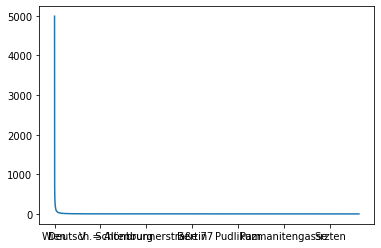

In [35]:
unique_locs.plot()

In [34]:
!ls entities/1920

arbeiter_zeitung.json		  le_matin.json		  new_york_herald.json
illustrierte_kronen_zeitung.json  l_oeuvre.json
innsbrucker_nachrichten.json	  neue_freie_presse.json


In [2]:
!pip install libvoikko

Defaulting to user installation because normal site-packages is not writeable
  Using cached libvoikko-4.3-py3-none-any.whl (9.7 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import geopandas as gpd
import pandas as pd

from tqdm import tqdm

year = 1916
paper = 'helsingin_sanomat'

locs = gpd.GeoDataFrame(pd.read_json(f'entities/{year}/{paper}.json'))
unique_locs = locs.mention.value_counts()

lemmata = []

with tqdm(total=unique_locs.shape[0]) as pbar:
    for loc, freq in unique_locs.iteritems():
        doc = nlp(loc)
        if len(doc.sentences[0].words) == 1:
            lemmata.append(doc.to_dict()[0][0]['lemma'])
        pbar.update(1)
    
unique_locs = pd.DataFrame(unique_locs)
unique_locs['lemma'] = lemmata

unique_locs['mention'] = unique_locs.index

lemmatized_locs = locs.merge(unique_locs)
lemmatized_locs.to_csv(f'entities/{year}/{paper}_lemmatized.json')

In [16]:
import pandas as pd

FPATH = 'entities/1913/helsingin_sanomat_1913.json'

pd.read_json(FPATH)

,id,link,type,mention,start_idx,end_idx,stance,date
0,entity_mention_helsingin_sanomat_1171660_0,https://www.wikidata.org/wiki/Q1757,LOC,Helsinki,0,11,0,1913-11-13
1,entity_mention_helsingin_sanomat_1171660_1,https://www.wikidata.org/wiki/Q159,LOC,Venäjä,189,198,0,1913-11-13
2,entity_mention_helsingin_sanomat_1171660_3,https://www.wikidata.org/wiki/Q1757,LOC,Helsinki,0,9,0,1913-11-13
3,entity_mention_helsingin_sanomat_1171660_4,https://www.wikidata.org/wiki/Q190583,LOC,Mikkeli,143,153,0,1913-11-13
4,entity_mention_helsingin_sanomat_1171660_5,None,LOC,Etelä Esplauaa-dik,17,36,0,1913-11-13
...,...,...,...,...,...,...,...,...
167603,entity_mention_helsingin_sanomat_883524_671,https://www.wikidata.org/wiki/Q14657,LOC,Viipuri,626,636,0,1913-06-25
167604,entity_mention_helsingin_sanomat_883524_672,None,LOC,Lappeenran-vinä,645,661,0,1913-06-25
167605,entity_mention_helsingin_sanomat_883524_673,None,LOC,Pietari,757,767,0,1913-06-25
167606,entity_mention_helsingin_sanomat_883524_674,https://www.wikidata.org/wiki/Q47048,LOC,Oulu,850,857,0,1913-06-25


In [17]:
from geopandas.tools import geocode
import geopandas as gpd
import pandas as pd
import time

from os.path import isfile

paper = 'helsingin_sanomat'

for year in ['1913', '1914', '1915', '1916', '1917', '1918']:
    geometry = gpd.GeoDataFrame(columns=['mention', 'geometry', 'address'])
    outpath = f'locations/{year}/{paper}.geojson'
    # if isfile(outpath):
    #    print('Loading geometry', outpath)
    #    geometry = gpd.read_file(outpath)
            
    entpath = f'entities/{year}/{paper}_{year}.json'
    print('reading', entpath)
    locs = gpd.GeoDataFrame(pd.read_json(entpath))
    unique_locs = locs.mention.value_counts()
    print(unique_locs[unique_locs > 1].shape[0])

    start = time.time()

    for i, item in enumerate(unique_locs[unique_locs > 1].iteritems()):
        if (i+1) % 1000 == 0:
            print(f"{i+1}/{unique_locs[unique_locs > 1].shape[0]} ({((i+1) / unique_locs[unique_locs > 1].shape[0]):.3f}) - {(time.time() - start):.3f}")
            start = time.time()

        place_name, freq = item

        if place_name in geometry.mention.tolist(): continue

        try:
            out = geocode(place_name, provider='nominatim', user_agent='autogis_xx', timeout=4)
            out['mention'] = place_name
            out['freq'] = freq
        except Exception as error:
            print(error)
            geometry.to_file(outpath, driver='GeoJSON') # shape per default
            time.sleep(5)

        geometry = geometry.append(out)

    print(f'Saving {year}/{paper}.geojson')
    geometry.to_file(f'locations/{year}/{paper}.geojson', driver='GeoJSON') # shape per default

/home/vagrant/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


reading entities/1913/helsingin_sanomat_1913.json
4218
1000/4218 (0.237) - 521.086
2000/4218 (0.474) - 521.823
3000/4218 (0.711) - 583.719
4000/4218 (0.948) - 576.393
Saving 1913/helsingin_sanomat.geojson
reading entities/1914/helsingin_sanomat_1914.json
4386
1000/4386 (0.228) - 525.543
2000/4386 (0.456) - 518.731
3000/4386 (0.684) - 528.819
4000/4386 (0.912) - 576.757
Saving 1914/helsingin_sanomat.geojson
reading entities/1915/helsingin_sanomat_1915.json
4636
1000/4636 (0.216) - 588.236
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Kallion+k+.+seur&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f2dc2f38eb8>: Failed to establish a new connection: [Errno 101] Network is unreachable',))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=J%C3%A4ms%C3%A4n+pit%C3%A4j%C3%A4n&format=json&limit=1 (Caused by NewConnectionErro

In [7]:
import geopandas as gpd
# gpd.options.use_pygeos = False

shape_1914 = gpd.read_file('shapefiles/cntry1914.shp')
shape_1914.set_index('NAME', inplace=True)

In [3]:
import geopandas as gpd

geometry

,mention,address,freq,geometry
0,Wien,"Wien, Österreich",5240.0,POINT (16.37250 48.20835)
1,Deutschland,Deutschland,2440.0,POINT (10.42345 51.08342)
2,Rußland,Россия,2388.0,POINT (97.74531 64.68631)
3,Berlin,"Berlin, 10117, Deutschland",2323.0,POINT (13.38886 52.51704)
4,Oesterreich,Österreich,2201.0,POINT (13.20000 47.20000)
...,...,...,...,...
6270,Slobodzia,"Слобода, Новоселицька міська громада, Чернівец...",2.0,POINT (26.19518 48.27804)
6271,beschossen,None,2.0,None
6272,Kriegsanleihen,None,2.0,None
6273,Liochten - steinstrasse,None,2.0,None


### What did the Geocoder miss?

In [28]:
geometry[geometry.address.isna()].to_csv(f'{paper}{year}_failed.csv')

In [2]:
geometry[geometry.address.isna()]

,mention,address,freq,geometry
62,Monatsbeitrag,None,821.0,None
77,Kriegspressequartier,None,710.0,None
95,"Bezirk , Mariahilferstraße Nr",None,543.0,None
98,"I . , Schulerstraße 15",None,517.0,None
102,Ostgalizien,None,505.0,None
...,...,...,...,...
30951,Moufalcone,None,2.0,None
30952,"Bez . , Juvalidenstraße 3",None,2.0,None
30956,"Wien , UnterMeidling , Schallergasse 3",None,2.0,None
30957,Kriegsgef .,None,2.0,None


In [3]:
from fuzzywuzzy import fuzz, process
from scipy.spatial.distance import pdist

query = 'Monatsbeitrag'

for mention in geometry[geometry.geometry.isna()].mention.unique():
    ratio = fuzz.ratio(query, mention)
    if ratio > 60: print(mention, '-', ratio)

Monatsbeitrag - 100
Jahresbeitrag - 69
Monatsbeiträge - 89
Wien , Monatsbeitrag - 79
Baden , Monatsbeitrag - 76
Mouatsbeitrag - 92
Monatsbeiträgen - 86
Bezirk , Monatsbeitrag - 74
Wien , Jahresbeitrag - 61
Mitgliedsbeitrag - 69
monatlicher Beitrag - 62
Monatshefte . - 62
Monarsbeitrag - 92
Vorartberg - 61
Marienbad , Monatsbeitrag - 68
Monatswagen - 67
Mödling , Jahresbeitrag - 61
Monatsbeitraa - 92
Monatsbeginn - 72
Pilsen , Monatsbeitrag - 74
Monatsbertrag - 92
monatelang - 61
Mödling , Monatsbeitrag - 72
Monatsrate - 70
Goisern , Jahresbeitrag - 61
St . M . , Monatsbeitrag - 70
Saaz , Monatsbeitrag - 79
